In [152]:
import pandas as pd


In [153]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from collections import Counter
from imblearn.under_sampling import TomekLinks
import pickle

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [154]:
food = pd.read_csv('fads.csv')

In [155]:
census = pd.read_csv('census.csv')

/Users/joseramirez/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,6,7,10,11,14,15,18,19,22,23,26,27,30,31,34,35,38,39,42,43,46,47,50,51,54,55,58,59,62,63,70,71,74,75,78,79,82,83,86,87,88,90,91,94,95,98,99,100,102,103,106,107,110,111,112,114,115,118,119,122,123,126,127,130,131,134,135,138,139,142,143,146,147,150,151,154,155,158,159,162,163,166,167,170,171,174,175,178,179,182,183,186,187,190,191,194,195,198,199,202,203,206,207,210,211,214,215,218,219,222,223,227,228,230,231,232,234,235,238,239,242,243,246,247,250,251,254,255,258,259,260,262,263,266,267,270,271,274,275,278,279,282,283,286,287,290,291,294,295,298,299,302,303,306,307,310,311,314,315,318,319,322,323) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [156]:
census.head(30)

GEO_ID                                          NAME  \
0                     id                          Geographic Area Name   
1   1400000US01035960200    Census Tract 9602, Conecuh County, Alabama   
2   1400000US01035960300    Census Tract 9603, Conecuh County, Alabama   
3   1400000US01035960400    Census Tract 9604, Conecuh County, Alabama   
4   1400000US01035960500    Census Tract 9605, Conecuh County, Alabama   
5   1400000US01035960600    Census Tract 9606, Conecuh County, Alabama   
6   1400000US01037961000      Census Tract 9610, Coosa County, Alabama   
7   1400000US01037961100      Census Tract 9611, Coosa County, Alabama   
8   1400000US01037961200      Census Tract 9612, Coosa County, Alabama   
9   1400000US01039961600  Census Tract 9616, Covington County, Alabama   
10  1400000US01039961700  Census Tract 9617, Covington County, Alabama   
11  1400000US01039961800  Census Tract 9618, Covington County, Alabama   
12  1400000US01039961900  Census Tract 9619, Covington County, Alabama   
13  1400000US01039962000  Census Tract 9620, Covington County, Alabama   
14  1400000US01039962100  Census Tract 9621, Covington County, Alabama   
15  1400000US01039962300  Census Tract 9623, Covington County, Alabama   
16  1400000US01039962400  Census Tract 9624, Covington County, Alabama   
17  1400000US01039962500  Census Tract 9625, Covington County, Alabama   
18  1400000US01039962600  Census Tract 9626, Covington County, Alabama   
19  1400000US01039962700  Census Tract 9627, Covington County, Alabama   
20  1400000US01039962800  Census Tract 9628, Covington County, Alabama   
21  1400000US01039962900  Census Tract 9629, Covington County, Alabama   
22  1400000US01039963000  Census Tract 9630, Covington County, Alabama   
23  1400000US01041963400   Census Tract 9634, Crenshaw County, Alabama   
24  1400000US01041963500   Census Tract 9635, Crenshaw County, Alabama   
25  1400000US01041963600   Census Tract 9636, Crenshaw County, Alabama   
26  1400000US01041963700   Census Tract 9637, Crenshaw County, Alabama   
27  1400000US01041963800   Census Tract 9638, Crenshaw County, Alabama   
28  1400000US01041963900   Census Tract 9639, Crenshaw County, Alabama   
29  1400000US01043964100    Census Tract 9641, Cullman County, Alabama   

                                 DP05_0001E  \
0   Estimate!!SEX AND AGE!!Total population   
1                                      1711   
2                                      2095   
3                                      3441   
4                                      1443   
5                                      4692   
6                                      4208   
7                                      4359   
8                                      2903   
9                                      3994   
10                                     3969   
11                                     2437   
12                                     2485   
13                                     3462   
14                                     2779   
15                                     2699   
16                                     3262   
17                                     1366   
18                                     1363   
19                                     1873   
20                                     1745   
21                                     1903   
22                                     4271   
23                                     1813   
24                                     1463   
25                                     3477   
26                                     4018   
27                                     1880   
28                                     1277   
29                                     5413   

                                           DP05_0001M  \
0   Estimate Margin of Error!!SEX AND AGE!!Total p...   
1                                                 324   
2                                                 379   
3                                    

In [ ]:
01001020100

In [45]:
for stuff in food.columns:
    print(stuff)

CensusTract
State
County
Urban
POP2010
OHU2010
GroupQuartersFlag
NUMGQTRS
PCTGQTRS
LILATracts_1And10
LILATracts_halfAnd10
LILATracts_1And20
LILATracts_Vehicle
HUNVFlag
LowIncomeTracts
PovertyRate
MedianFamilyIncome
LA1and10
LAhalfand10
LA1and20
LATracts_half
LATracts1
LATracts10
LATracts20
LATractsVehicle_20
LAPOP1_10
LAPOP05_10
LAPOP1_20
LALOWI1_10
LALOWI05_10
LALOWI1_20
lapophalf
lapophalfshare
lalowihalf
lalowihalfshare
lakidshalf
lakidshalfshare
laseniorshalf
laseniorshalfshare
lawhitehalf
lawhitehalfshare
lablackhalf
lablackhalfshare
laasianhalf
laasianhalfshare
lanhopihalf
lanhopihalfshare
laaianhalf
laaianhalfshare
laomultirhalf
laomultirhalfshare
lahisphalf
lahisphalfshare
lahunvhalf
lahunvhalfshare
lasnaphalf
lasnaphalfshare
lapop1
lapop1share
lalowi1
lalowi1share
lakids1
lakids1share
laseniors1
laseniors1share
lawhite1
lawhite1share
lablack1
lablack1share
laasian1
laasian1share
lanhopi1
lanhopi1share
laaian1
laaian1share
laomultir1
laomultir1share
lahisp1
lahisp1share
lahunv1

In [157]:
food = food[['LA1and10','CensusTract', 'State', 'County', 'Urban', 'POP2010', 'OHU2010', 'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'HUNVFlag', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome', 'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP' ]]



In [158]:
food.LA1and10.value_counts()

0    45337
1    27527
Name: LA1and10, dtype: int64

In [159]:
X = food.drop(['LA1and10', 'CensusTract', 'State', 'County'], axis = 1)
y = food.LA1and10

In [160]:
X.dtypes

Urban                   int64
POP2010                 int64
OHU2010                 int64
GroupQuartersFlag       int64
NUMGQTRS                int64
PCTGQTRS              float64
HUNVFlag                int64
LowIncomeTracts         int64
PovertyRate           float64
MedianFamilyIncome      int64
TractLOWI               int64
TractKids               int64
TractSeniors            int64
TractWhite              int64
TractBlack              int64
TractAsian              int64
TractNHOPI              int64
TractAIAN               int64
TractOMultir            int64
TractHispanic           int64
TractHUNV               int64
TractSNAP               int64
dtype: object

In [84]:
##Splitting the data with train_test_split

X_traintl, X_testtl, y_traintl, y_testtl = train_test_split(X, y, random_state=1)

In [85]:
## I am going to use TomekLinks to downsample because I have a significant class imbalance 
## in my food desert variable.

tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_traintl, y_traintl)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 29114, 1: 20575})


In [86]:
param_dict={'max_depth': range(1,5,1),'criterion': ['gini','entropy'], 'min_samples_leaf' : range(10,20,1), 'max_leaf_nodes': range(0,10,1), 'class_weight': ['balanced']}

In [87]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=1),
                  param_grid= param_dict,
                  scoring='recall', cv=3,verbose = 1, n_jobs=-1)

In [88]:
gs.fit(X_res, y_res)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 1480 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:   39.6s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'max_leaf_nodes': range(0, 10),
                         'min_samples_leaf': range(10, 20)},
             scoring='recall', verbose=1)

In [89]:
gs.best_score_

0.8843255995699343

In [90]:
y_predsgs=gs.best_estimator_.predict(X_testtl)

In [91]:
recall_score(y_testtl,y_predsgs)

0.8813291139240507

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
cm = confusion_matrix(y_testtl,y_predsgs)
classes = ['Not Food Desert', 'Food Desert']

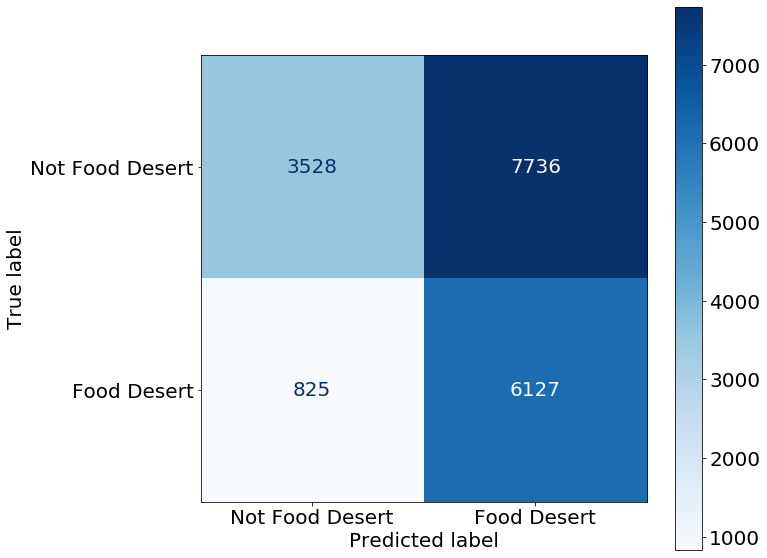

In [94]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

plt.rcParams.update({'font.size': 20})

plot_confusion_matrix(gs, X_testtl, y_testtl, cmap=plt.cm.Blues, display_labels = classes, ax=ax)

In [96]:
rf = RandomForestClassifier(class_weight='balanced', random_state=1)
param_dictrf={'n_estimators': [100,200], 'max_depth': range(3,5,1), 'criterion': ['gini','entropy'],'min_samples_leaf' : range(5,10,1), 'max_leaf_nodes': range(0,10,1)}
gs_forest=GridSearchCV(rf,param_dictrf,scoring='recall',cv=3,verbose=1,n_jobs=-1)

#Fitting
gs_forest.fit(X_res,y_res)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  7.2min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 5),
                         'max_leaf_nodes': range(0, 10),
                         'min_samples_leaf': range(5, 10),
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=1)

In [97]:
gs_forest.best_score_

0.6399518680469165

In [137]:
census['NAME'].value_counts()

Census Tract 200, Dallas County, Texas                    1
Census Tract 8043.08, Cook County, Illinois               1
Census Tract 8041.02, Prince George's County, Maryland    1
Census Tract 902, Pennington County, Minnesota            1
Census Tract 6723.02, Fort Bend County, Texas             1
                                                         ..
Census Tract 4702.02, Webster County, Missouri            1
Census Tract 314, Harrison County, West Virginia          1
Census Tract 1145.01, Cuyahoga County, Ohio               1
Census Tract 1547, Cuyahoga County, Ohio                  1
Census Tract 7305.04, Anne Arundel County, Maryland       1
Name: NAME, Length: 74003, dtype: int64

In [161]:
census.GEO_ID

0                          id
1        1400000US01035960200
2        1400000US01035960300
3        1400000US01035960400
4        1400000US01035960500
                 ...         
73998    1400000US56043000200
73999    1400000US56043000301
74000    1400000US56043000302
74001    1400000US56045951100
74002    1400000US56045951300
Name: GEO_ID, Length: 74003, dtype: object

In [163]:
census.GEO_ID[1][10:20]

'1035960200'

In [170]:
census.GEO_ID[1][9] == '0'


True

In [171]:
census.GEO_ID = census.GEO_ID.apply(lambda x: x[9:20])

In [185]:
census.GEO_ID

0                 45
1        01035960200
2        01035960300
3        01035960400
4        01035960500
            ...     
73998    56043000200
73999    56043000301
74000    56043000302
74001    56045951100
74002    56045951300
Name: GEO_ID, Length: 74003, dtype: object

In [174]:
census.GEO_ID = census.GEO_ID.apply(lambda x: x[10:20] if x[9] == '0' else)

SyntaxError: invalid syntax (<ipython-input-174-392cdb7a3368>, line 1)

In [169]:
census.GEO_ID = census.GEO_ID.apply(lambda x: x[10:20] if x[9] == '0' else x[9:20])

IndexError: string index out of range

In [151]:
census

GEO_ID                                         NAME  \
0                                          Geographic Area Name   
1      01035960200   Census Tract 9602, Conecuh County, Alabama   
2      01035960300   Census Tract 9603, Conecuh County, Alabama   
3      01035960400   Census Tract 9604, Conecuh County, Alabama   
4      01035960500   Census Tract 9605, Conecuh County, Alabama   
...            ...                                          ...   
73998  56043000200     Census Tract 2, Washakie County, Wyoming   
73999  56043000301  Census Tract 3.01, Washakie County, Wyoming   
74000  56043000302  Census Tract 3.02, Washakie County, Wyoming   
74001  56045951100    Census Tract 9511, Weston County, Wyoming   
74002  56045951300    Census Tract 9513, Weston County, Wyoming   

                                    DP05_0001E  \
0      Estimate!!SEX AND AGE!!Total population   
1                                         1711   
2                                         2095   
3                                         3441   
4                                         1443   
...                                        ...   
73998                                     3318   
73999                                     2900   
74000                                     2053   
74001                                     2945   
74002                                     4121   

                                              DP05_0001M  \
0      Estimate Margin of Error!!SEX AND AGE!!Total p...   
1                                                    324   
2                                                    379   
3                                                    466   
4                                                    412   
...                                                  ...   
73998                                                182   
73999                                                199   
74000                                                224   
74001                                                356   
74002                                                356   

                                  DP05_0001PE  \
0      Percent!!SEX AND AGE!!Total population   
1                                        1711   
2                                        2095   
3                                        3441   
4                                        1443   
...                                       ...   
73998                                    3318   
73999                                    2900   
74000                                    2053   
74001                                    2945   
74002                                    4121   

                                             DP05_0001PM  \
0      Percent Margin of Error!!SEX AND AGE!!Total po...   
1                                                    (X)   
2                                                    (X)   
3                                                    (X)   
4                                                    (X)   
...                                                  ...   
73998                                                (X)   
73999                                                (X)   
74000                                                (X)   
74001                                                (X)   
74002                                                (X)   

                        DP05_0002E  \
0      Estimate!!SEX AND AGE!!Male   
1                              813   
2                              884   
3                             1765   
4                              716   
...                            ...   
73998                         1747   
73999                         1493   
74000                         1019   
74001                         1653   
74002                         2032   

                                        DP05_0002M  \
0      Estimate Margin of Error!!SEX AND AGE!!Male   
1         

In [186]:
food

LA1and10  CensusTract    State    County  Urban  POP2010  OHU2010  \
0             1   1001020100  Alabama   Autauga      1     1912      693   
1             0   1001020200  Alabama   Autauga      1     2170      743   
2             1   1001020300  Alabama   Autauga      1     3373     1256   
3             1   1001020400  Alabama   Autauga      1     4386     1722   
4             1   1001020500  Alabama   Autauga      1    10766     4082   
...         ...          ...      ...       ...    ...      ...      ...   
72859         1  56043000200  Wyoming  Washakie      0     3326     1317   
72860         0  56043000301  Wyoming  Washakie      1     2665     1154   
72861         0  56043000302  Wyoming  Washakie      1     2542     1021   
72862         1  56045951100  Wyoming    Weston      0     3314     1322   
72863         1  56045951300  Wyoming    Weston      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  HUNVFlag  LowIncomeTracts  \
0                      0         0  0.000000         0                0   
1                      0       181  0.083410         0                0   
2                      0         0  0.000000         0                0   
3                      0         0  0.000000         0                0   
4                      0       181  0.016812         1                0   
...                  ...       ...       ...       ...              ...   
72859                  0        57  0.017138         0                0   
72860                  0        10  0.003752         0                1   
72861                  0        73  0.028717         0                0   
72862                  0       252  0.076041         0                0   
72863                  0        61  0.015665         0                0   

       PovertyRate  MedianFamilyIncome  TractLOWI  TractKids  TractSeniors  \
0             10.0               74750        448        507           221   
1             18.2               51875        763        606           214   
2             19.1               52905       1578        894           439   
3              3.3               68079       1241       1015           904   
4              8.5               77819       2692       3162          1126   
...            ...                 ...        ...        ...           ...   
72859         15.2               67917       1013        884           593   
72860         14.5               52474       1214        674           399   
72861         12.7               66250        742        614           516   
72862          9.2               81500        671        655           499   
72863         15.0               68966       1390        918           650   

       TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0            1622         217          14           0         14   
1             888        1217           5           0          5   
2            2576         647          17           5         11   
3            4086         193          18           4         11   
4            8666        1437         296           9         48   
...           ...         ...         ...         ...        ...   
72859        3106           6          15           0         27   
72860        2377           5          23           0         40   
72861        2312          11          10           1         26   
72862        3179          15          10           1         47   
72863        3706           6          10           2         44   

       TractOMultir  TractHispanic  TractHUNV  TractSNAP  
0                45             44         26        112  
1                55             75         87        202  
2               117             87        108        120  
3                74             85         19         82  
4               310            355        198        488  
...             ...            ...        ...        ...  
72859           172       

In [198]:
census.GEO_ID[1][0:11]

'01035960200'

In [206]:
census.GEO_ID = census.GEO_ID.apply(lambda x: x[1:11] if x[0] == '0' else x[0:11])

In [214]:
census.GEO_ID

0               TEST
1         1035960200
2         1035960300
3         1035960400
4         1035960500
            ...     
73998    56043000200
73999    56043000301
74000    56043000302
74001    56045951100
74002    56045951300
Name: GEO_ID, Length: 74003, dtype: object

In [215]:
census.GEO_ID

0               TEST
1         1035960200
2         1035960300
3         1035960400
4         1035960500
            ...     
73998    56043000200
73999    56043000301
74000    56043000302
74001    56045951100
74002    56045951300
Name: GEO_ID, Length: 74003, dtype: object

In [217]:
census.rename(columns = {"GEO_ID": "CensusTract"}, inplace = True)

In [218]:
census


CensusTract                                         NAME  \
0             TEST                         Geographic Area Name   
1       1035960200   Census Tract 9602, Conecuh County, Alabama   
2       1035960300   Census Tract 9603, Conecuh County, Alabama   
3       1035960400   Census Tract 9604, Conecuh County, Alabama   
4       1035960500   Census Tract 9605, Conecuh County, Alabama   
...            ...                                          ...   
73998  56043000200     Census Tract 2, Washakie County, Wyoming   
73999  56043000301  Census Tract 3.01, Washakie County, Wyoming   
74000  56043000302  Census Tract 3.02, Washakie County, Wyoming   
74001  56045951100    Census Tract 9511, Weston County, Wyoming   
74002  56045951300    Census Tract 9513, Weston County, Wyoming   

                                    DP05_0001E  \
0      Estimate!!SEX AND AGE!!Total population   
1                                         1711   
2                                         2095   
3                                         3441   
4                                         1443   
...                                        ...   
73998                                     3318   
73999                                     2900   
74000                                     2053   
74001                                     2945   
74002                                     4121   

                                              DP05_0001M  \
0      Estimate Margin of Error!!SEX AND AGE!!Total p...   
1                                                    324   
2                                                    379   
3                                                    466   
4                                                    412   
...                                                  ...   
73998                                                182   
73999                                                199   
74000                                                224   
74001                                                356   
74002                                                356   

                                  DP05_0001PE  \
0      Percent!!SEX AND AGE!!Total population   
1                                        1711   
2                                        2095   
3                                        3441   
4                                        1443   
...                                       ...   
73998                                    3318   
73999                                    2900   
74000                                    2053   
74001                                    2945   
74002                                    4121   

                                             DP05_0001PM  \
0      Percent Margin of Error!!SEX AND AGE!!Total po...   
1                                                    (X)   
2                                                    (X)   
3                                                    (X)   
4                                                    (X)   
...                                                  ...   
73998                                                (X)   
73999                                                (X)   
74000                                                (X)   
74001                                                (X)   
74002                                                (X)   

                        DP05_0002E  \
0      Estimate!!SEX AND AGE!!Male   
1                              813   
2                              884   
3                             1765   
4                              716   
...                            ...   
73998                         1747   
73999                         1493   
74000                         1019   
74001                         1653   
74002                         2032   

                                        DP05_0002M  \
0      Estimate Margin of Error!!SEX AND AGE!!Male   
1    

In [222]:
census.iloc[0,:]

CensusTract                                                 TEST
NAME                                        Geographic Area Name
DP05_0001E               Estimate!!SEX AND AGE!!Total population
DP05_0001M     Estimate Margin of Error!!SEX AND AGE!!Total p...
DP05_0001PE               Percent!!SEX AND AGE!!Total population
DP05_0001PM    Percent Margin of Error!!SEX AND AGE!!Total po...
DP05_0002E                           Estimate!!SEX AND AGE!!Male
DP05_0002M           Estimate Margin of Error!!SEX AND AGE!!Male
DP05_0002PE                           Percent!!SEX AND AGE!!Male
DP05_0002PM           Percent Margin of Error!!SEX AND AGE!!Male
DP05_0003E                         Estimate!!SEX AND AGE!!Female
DP05_0003M         Estimate Margin of Error!!SEX AND AGE!!Female
DP05_0003PE                         Percent!!SEX AND AGE!!Female
DP05_0003PM         Percent Margin of Error!!SEX AND AGE!!Female
DP05_0004E                  Estimate!!SEX AND AGE!!Under 5 years
DP05_0004M     Estimate M

In [223]:
census.columns = census.iloc[0]

In [225]:
census=census.iloc[1:]

In [227]:
census.rename(columns = {"TEST": "CensusTract"}, inplace = True)

/Users/joseramirez/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [229]:
census['CensusTract']

1         1035960200
2         1035960300
3         1035960400
4         1035960500
5         1035960600
            ...     
73998    56043000200
73999    56043000301
74000    56043000302
74001    56045951100
74002    56045951300
Name: CensusTract, Length: 74002, dtype: object

In [230]:
food['CensusTract']

0         1001020100
1         1001020200
2         1001020300
3         1001020400
4         1001020500
            ...     
72859    56043000200
72860    56043000301
72861    56043000302
72862    56045951100
72863    56045951300
Name: CensusTract, Length: 72864, dtype: int64

In [231]:
df = pd.merge(food,census, on = "CensusTract")

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [232]:
food['CensusTract']

0         1001020100
1         1001020200
2         1001020300
3         1001020400
4         1001020500
            ...     
72859    56043000200
72860    56043000301
72861    56043000302
72862    56045951100
72863    56045951300
Name: CensusTract, Length: 72864, dtype: int64

In [235]:
census['CensusTract'] = pd.to_numeric(census['CensusTract'])

/Users/joseramirez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [236]:
census['CensusTract']

1         1035960200
2         1035960300
3         1035960400
4         1035960500
5         1035960600
            ...     
73998    56043000200
73999    56043000301
74000    56043000302
74001    56045951100
74002    56045951300
Name: CensusTract, Length: 74002, dtype: int64

In [289]:
df = pd.merge(food,census, on = "CensusTract")

In [290]:
df

LA1and10  CensusTract    State    County  Urban  POP2010  OHU2010  \
0             1   1001020100  Alabama   Autauga      1     1912      693   
1             0   1001020200  Alabama   Autauga      1     2170      743   
2             1   1001020300  Alabama   Autauga      1     3373     1256   
3             1   1001020400  Alabama   Autauga      1     4386     1722   
4             1   1001020500  Alabama   Autauga      1    10766     4082   
...         ...          ...      ...       ...    ...      ...      ...   
72859         1  56043000200  Wyoming  Washakie      0     3326     1317   
72860         0  56043000301  Wyoming  Washakie      1     2665     1154   
72861         0  56043000302  Wyoming  Washakie      1     2542     1021   
72862         1  56045951100  Wyoming    Weston      0     3314     1322   
72863         1  56045951300  Wyoming    Weston      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  HUNVFlag  LowIncomeTracts  \
0                      0         0  0.000000         0                0   
1                      0       181  0.083410         0                0   
2                      0         0  0.000000         0                0   
3                      0         0  0.000000         0                0   
4                      0       181  0.016812         1                0   
...                  ...       ...       ...       ...              ...   
72859                  0        57  0.017138         0                0   
72860                  0        10  0.003752         0                1   
72861                  0        73  0.028717         0                0   
72862                  0       252  0.076041         0                0   
72863                  0        61  0.015665         0                0   

       PovertyRate  MedianFamilyIncome  TractLOWI  TractKids  TractSeniors  \
0             10.0               74750        448        507           221   
1             18.2               51875        763        606           214   
2             19.1               52905       1578        894           439   
3              3.3               68079       1241       1015           904   
4              8.5               77819       2692       3162          1126   
...            ...                 ...        ...        ...           ...   
72859         15.2               67917       1013        884           593   
72860         14.5               52474       1214        674           399   
72861         12.7               66250        742        614           516   
72862          9.2               81500        671        655           499   
72863         15.0               68966       1390        918           650   

       TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0            1622         217          14           0         14   
1             888        1217           5           0          5   
2            2576         647          17           5         11   
3            4086         193          18           4         11   
4            8666        1437         296           9         48   
...           ...         ...         ...         ...        ...   
72859        3106           6          15           0         27   
72860        2377           5          23           0         40   
72861        2312          11          10           1         26   
72862        3179          15          10           1         47   
72863        3706           6          10           2         44   

       TractOMultir  TractHispanic  TractHUNV  TractSNAP  \
0                45             44         26        112   
1                55             75         87        202   
2               117             87        108        120   
3                74             85         19         82   
4               310            355        198        488   
...             ...            ...        ...        ...   
72859           172

In [251]:
df = df[cols]

In [252]:
df

LA1and10  CensusTract    State    County  Urban  POP2010  OHU2010  \
0             1   1001020100  Alabama   Autauga      1     1912      693   
1             0   1001020200  Alabama   Autauga      1     2170      743   
2             1   1001020300  Alabama   Autauga      1     3373     1256   
3             1   1001020400  Alabama   Autauga      1     4386     1722   
4             1   1001020500  Alabama   Autauga      1    10766     4082   
...         ...          ...      ...       ...    ...      ...      ...   
72859         1  56043000200  Wyoming  Washakie      0     3326     1317   
72860         0  56043000301  Wyoming  Washakie      1     2665     1154   
72861         0  56043000302  Wyoming  Washakie      1     2542     1021   
72862         1  56045951100  Wyoming    Weston      0     3314     1322   
72863         1  56045951300  Wyoming    Weston      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  HUNVFlag  LowIncomeTracts  \
0                      0         0  0.000000         0                0   
1                      0       181  0.083410         0                0   
2                      0         0  0.000000         0                0   
3                      0         0  0.000000         0                0   
4                      0       181  0.016812         1                0   
...                  ...       ...       ...       ...              ...   
72859                  0        57  0.017138         0                0   
72860                  0        10  0.003752         0                1   
72861                  0        73  0.028717         0                0   
72862                  0       252  0.076041         0                0   
72863                  0        61  0.015665         0                0   

       PovertyRate  MedianFamilyIncome  TractLOWI  TractKids  TractSeniors  \
0             10.0               74750        448        507           221   
1             18.2               51875        763        606           214   
2             19.1               52905       1578        894           439   
3              3.3               68079       1241       1015           904   
4              8.5               77819       2692       3162          1126   
...            ...                 ...        ...        ...           ...   
72859         15.2               67917       1013        884           593   
72860         14.5               52474       1214        674           399   
72861         12.7               66250        742        614           516   
72862          9.2               81500        671        655           499   
72863         15.0               68966       1390        918           650   

       TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0            1622         217          14           0         14   
1             888        1217           5           0          5   
2            2576         647          17           5         11   
3            4086         193          18           4         11   
4            8666        1437         296           9         48   
...           ...         ...         ...         ...        ...   
72859        3106           6          15           0         27   
72860        2377           5          23           0         40   
72861        2312          11          10           1         26   
72862        3179          15          10           1         47   
72863        3706           6          10           2         44   

       TractOMultir  TractHispanic  TractHUNV  TractSNAP  \
0                45             44         26        112   
1                55             75         87        202   
2               117             87        108        120   
3                74             85         19         82   
4               310            355        198        488   
...             ...            ...        ...        ...   
72859           172

In [291]:
df

LA1and10  CensusTract    State    County  Urban  POP2010  OHU2010  \
0             1   1001020100  Alabama   Autauga      1     1912      693   
1             0   1001020200  Alabama   Autauga      1     2170      743   
2             1   1001020300  Alabama   Autauga      1     3373     1256   
3             1   1001020400  Alabama   Autauga      1     4386     1722   
4             1   1001020500  Alabama   Autauga      1    10766     4082   
...         ...          ...      ...       ...    ...      ...      ...   
72859         1  56043000200  Wyoming  Washakie      0     3326     1317   
72860         0  56043000301  Wyoming  Washakie      1     2665     1154   
72861         0  56043000302  Wyoming  Washakie      1     2542     1021   
72862         1  56045951100  Wyoming    Weston      0     3314     1322   
72863         1  56045951300  Wyoming    Weston      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  HUNVFlag  LowIncomeTracts  \
0                      0         0  0.000000         0                0   
1                      0       181  0.083410         0                0   
2                      0         0  0.000000         0                0   
3                      0         0  0.000000         0                0   
4                      0       181  0.016812         1                0   
...                  ...       ...       ...       ...              ...   
72859                  0        57  0.017138         0                0   
72860                  0        10  0.003752         0                1   
72861                  0        73  0.028717         0                0   
72862                  0       252  0.076041         0                0   
72863                  0        61  0.015665         0                0   

       PovertyRate  MedianFamilyIncome  TractLOWI  TractKids  TractSeniors  \
0             10.0               74750        448        507           221   
1             18.2               51875        763        606           214   
2             19.1               52905       1578        894           439   
3              3.3               68079       1241       1015           904   
4              8.5               77819       2692       3162          1126   
...            ...                 ...        ...        ...           ...   
72859         15.2               67917       1013        884           593   
72860         14.5               52474       1214        674           399   
72861         12.7               66250        742        614           516   
72862          9.2               81500        671        655           499   
72863         15.0               68966       1390        918           650   

       TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0            1622         217          14           0         14   
1             888        1217           5           0          5   
2            2576         647          17           5         11   
3            4086         193          18           4         11   
4            8666        1437         296           9         48   
...           ...         ...         ...         ...        ...   
72859        3106           6          15           0         27   
72860        2377           5          23           0         40   
72861        2312          11          10           1         26   
72862        3179          15          10           1         47   
72863        3706           6          10           2         44   

       TractOMultir  TractHispanic  TractHUNV  TractSNAP  \
0                45             44         26        112   
1                55             75         87        202   
2               117             87        108        120   
3                74             85         19         82   
4               310            355        198        488   
...             ...            ...        ...        ...   
72859           172

In [292]:
df.drop([col for col in df.columns if 'Margin' in col],axis=1,inplace=True)

In [293]:
df.rename(columns = {"Estimate!!Total housing units": "Total Housing Units"}, inplace = True)

In [294]:
df.rename(columns = {"Percent!!SEX AND AGE!!Total population": "Total Population"}, inplace = True)

In [295]:
df.drop(columns = ['Percent!!Total housing units'], inplace=True)

In [297]:
df.rename(columns = {"Estimate!!SEX AND AGE!!Median age (years)": "Median Age"}, inplace = True)

In [298]:
df

LA1and10  CensusTract    State    County  Urban  POP2010  OHU2010  \
0             1   1001020100  Alabama   Autauga      1     1912      693   
1             0   1001020200  Alabama   Autauga      1     2170      743   
2             1   1001020300  Alabama   Autauga      1     3373     1256   
3             1   1001020400  Alabama   Autauga      1     4386     1722   
4             1   1001020500  Alabama   Autauga      1    10766     4082   
...         ...          ...      ...       ...    ...      ...      ...   
72859         1  56043000200  Wyoming  Washakie      0     3326     1317   
72860         0  56043000301  Wyoming  Washakie      1     2665     1154   
72861         0  56043000302  Wyoming  Washakie      1     2542     1021   
72862         1  56045951100  Wyoming    Weston      0     3314     1322   
72863         1  56045951300  Wyoming    Weston      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  HUNVFlag  LowIncomeTracts  \
0                      0         0  0.000000         0                0   
1                      0       181  0.083410         0                0   
2                      0         0  0.000000         0                0   
3                      0         0  0.000000         0                0   
4                      0       181  0.016812         1                0   
...                  ...       ...       ...       ...              ...   
72859                  0        57  0.017138         0                0   
72860                  0        10  0.003752         0                1   
72861                  0        73  0.028717         0                0   
72862                  0       252  0.076041         0                0   
72863                  0        61  0.015665         0                0   

       PovertyRate  MedianFamilyIncome  TractLOWI  TractKids  TractSeniors  \
0             10.0               74750        448        507           221   
1             18.2               51875        763        606           214   
2             19.1               52905       1578        894           439   
3              3.3               68079       1241       1015           904   
4              8.5               77819       2692       3162          1126   
...            ...                 ...        ...        ...           ...   
72859         15.2               67917       1013        884           593   
72860         14.5               52474       1214        674           399   
72861         12.7               66250        742        614           516   
72862          9.2               81500        671        655           499   
72863         15.0               68966       1390        918           650   

       TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0            1622         217          14           0         14   
1             888        1217           5           0          5   
2            2576         647          17           5         11   
3            4086         193          18           4         11   
4            8666        1437         296           9         48   
...           ...         ...         ...         ...        ...   
72859        3106           6          15           0         27   
72860        2377           5          23           0         40   
72861        2312          11          10           1         26   
72862        3179          15          10           1         47   
72863        3706           6          10           2         44   

       TractOMultir  TractHispanic  TractHUNV  TractSNAP  \
0                45             44         26        112   
1                55             75         87        202   
2               117             87        108        120   
3                74             85         19         82   
4               310            355        198        488   
...             ...            ...        ...        ...   
72859           172

In [299]:
df.drop([col for col in df.columns if 'Estimate' in col],axis=1,inplace=True)

In [301]:
df.drop(columns = ['Geographic Area Name'], inplace=True)

In [308]:
df.apply(lambda x: x.replace("SEX AND AGE", ""))

LA1and10  CensusTract    State    County  Urban  POP2010  OHU2010  \
0             1   1001020100  Alabama   Autauga      1     1912      693   
1             0   1001020200  Alabama   Autauga      1     2170      743   
2             1   1001020300  Alabama   Autauga      1     3373     1256   
3             1   1001020400  Alabama   Autauga      1     4386     1722   
4             1   1001020500  Alabama   Autauga      1    10766     4082   
...         ...          ...      ...       ...    ...      ...      ...   
72859         1  56043000200  Wyoming  Washakie      0     3326     1317   
72860         0  56043000301  Wyoming  Washakie      1     2665     1154   
72861         0  56043000302  Wyoming  Washakie      1     2542     1021   
72862         1  56045951100  Wyoming    Weston      0     3314     1322   
72863         1  56045951300  Wyoming    Weston      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  HUNVFlag  LowIncomeTracts  \
0                      0         0  0.000000         0                0   
1                      0       181  0.083410         0                0   
2                      0         0  0.000000         0                0   
3                      0         0  0.000000         0                0   
4                      0       181  0.016812         1                0   
...                  ...       ...       ...       ...              ...   
72859                  0        57  0.017138         0                0   
72860                  0        10  0.003752         0                1   
72861                  0        73  0.028717         0                0   
72862                  0       252  0.076041         0                0   
72863                  0        61  0.015665         0                0   

       PovertyRate  MedianFamilyIncome  TractLOWI  TractKids  TractSeniors  \
0             10.0               74750        448        507           221   
1             18.2               51875        763        606           214   
2             19.1               52905       1578        894           439   
3              3.3               68079       1241       1015           904   
4              8.5               77819       2692       3162          1126   
...            ...                 ...        ...        ...           ...   
72859         15.2               67917       1013        884           593   
72860         14.5               52474       1214        674           399   
72861         12.7               66250        742        614           516   
72862          9.2               81500        671        655           499   
72863         15.0               68966       1390        918           650   

       TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0            1622         217          14           0         14   
1             888        1217           5           0          5   
2            2576         647          17           5         11   
3            4086         193          18           4         11   
4            8666        1437         296           9         48   
...           ...         ...         ...         ...        ...   
72859        3106           6          15           0         27   
72860        2377           5          23           0         40   
72861        2312          11          10           1         26   
72862        3179          15          10           1         47   
72863        3706           6          10           2         44   

       TractOMultir  TractHispanic  TractHUNV  TractSNAP Total Population  \
0                45             44         26        112             1809   
1                55             75         87        202             2020   
2               117             87        108        120             3543   
3                74             85         19         82             4840   
4               310            355        198        4

In [304]:
x = "Percent!!SEX AND AGE!!Female"

In [305]:
x.strip("SEX AND AGE")

'Percent!!SEX AND AGE!!Female'

In [306]:
x

'Percent!!SEX AND AGE!!Female'

In [309]:
df.columns = df.columns.str.replace("SEX AND AGE", "")

In [313]:
df.columns = df.columns.str.replace("RACE", "")

In [311]:
df.columns = df.columns.str.replace("!!!!", " ")

In [315]:
df

LA1and10  CensusTract    State    County  Urban  POP2010  OHU2010  \
0             1   1001020100  Alabama   Autauga      1     1912      693   
1             0   1001020200  Alabama   Autauga      1     2170      743   
2             1   1001020300  Alabama   Autauga      1     3373     1256   
3             1   1001020400  Alabama   Autauga      1     4386     1722   
4             1   1001020500  Alabama   Autauga      1    10766     4082   
...         ...          ...      ...       ...    ...      ...      ...   
72859         1  56043000200  Wyoming  Washakie      0     3326     1317   
72860         0  56043000301  Wyoming  Washakie      1     2665     1154   
72861         0  56043000302  Wyoming  Washakie      1     2542     1021   
72862         1  56045951100  Wyoming    Weston      0     3314     1322   
72863         1  56045951300  Wyoming    Weston      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  HUNVFlag  LowIncomeTracts  \
0                      0         0  0.000000         0                0   
1                      0       181  0.083410         0                0   
2                      0         0  0.000000         0                0   
3                      0         0  0.000000         0                0   
4                      0       181  0.016812         1                0   
...                  ...       ...       ...       ...              ...   
72859                  0        57  0.017138         0                0   
72860                  0        10  0.003752         0                1   
72861                  0        73  0.028717         0                0   
72862                  0       252  0.076041         0                0   
72863                  0        61  0.015665         0                0   

       PovertyRate  MedianFamilyIncome  TractLOWI  TractKids  TractSeniors  \
0             10.0               74750        448        507           221   
1             18.2               51875        763        606           214   
2             19.1               52905       1578        894           439   
3              3.3               68079       1241       1015           904   
4              8.5               77819       2692       3162          1126   
...            ...                 ...        ...        ...           ...   
72859         15.2               67917       1013        884           593   
72860         14.5               52474       1214        674           399   
72861         12.7               66250        742        614           516   
72862          9.2               81500        671        655           499   
72863         15.0               68966       1390        918           650   

       TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0            1622         217          14           0         14   
1             888        1217           5           0          5   
2            2576         647          17           5         11   
3            4086         193          18           4         11   
4            8666        1437         296           9         48   
...           ...         ...         ...         ...        ...   
72859        3106           6          15           0         27   
72860        2377           5          23           0         40   
72861        2312          11          10           1         26   
72862        3179          15          10           1         47   
72863        3706           6          10           2         44   

       TractOMultir  TractHispanic  TractHUNV  TractSNAP Total Population  \
0                45             44         26        112             1809   
1                55             75         87        202             2020   
2               117             87        108        120             3543   
3                74             85         19         82             4840   
4               310            355        198        4

In [ ]:
df.drop(columns = ['Geographic Area Name'], inplace=True)

In [316]:
df.drop(columns = ['Percent Median age (years)'], inplace=True)

In [317]:
df

LA1and10  CensusTract    State    County  Urban  POP2010  OHU2010  \
0             1   1001020100  Alabama   Autauga      1     1912      693   
1             0   1001020200  Alabama   Autauga      1     2170      743   
2             1   1001020300  Alabama   Autauga      1     3373     1256   
3             1   1001020400  Alabama   Autauga      1     4386     1722   
4             1   1001020500  Alabama   Autauga      1    10766     4082   
...         ...          ...      ...       ...    ...      ...      ...   
72859         1  56043000200  Wyoming  Washakie      0     3326     1317   
72860         0  56043000301  Wyoming  Washakie      1     2665     1154   
72861         0  56043000302  Wyoming  Washakie      1     2542     1021   
72862         1  56045951100  Wyoming    Weston      0     3314     1322   
72863         1  56045951300  Wyoming    Weston      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  HUNVFlag  LowIncomeTracts  \
0                      0         0  0.000000         0                0   
1                      0       181  0.083410         0                0   
2                      0         0  0.000000         0                0   
3                      0         0  0.000000         0                0   
4                      0       181  0.016812         1                0   
...                  ...       ...       ...       ...              ...   
72859                  0        57  0.017138         0                0   
72860                  0        10  0.003752         0                1   
72861                  0        73  0.028717         0                0   
72862                  0       252  0.076041         0                0   
72863                  0        61  0.015665         0                0   

       PovertyRate  MedianFamilyIncome  TractLOWI  TractKids  TractSeniors  \
0             10.0               74750        448        507           221   
1             18.2               51875        763        606           214   
2             19.1               52905       1578        894           439   
3              3.3               68079       1241       1015           904   
4              8.5               77819       2692       3162          1126   
...            ...                 ...        ...        ...           ...   
72859         15.2               67917       1013        884           593   
72860         14.5               52474       1214        674           399   
72861         12.7               66250        742        614           516   
72862          9.2               81500        671        655           499   
72863         15.0               68966       1390        918           650   

       TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0            1622         217          14           0         14   
1             888        1217           5           0          5   
2            2576         647          17           5         11   
3            4086         193          18           4         11   
4            8666        1437         296           9         48   
...           ...         ...         ...         ...        ...   
72859        3106           6          15           0         27   
72860        2377           5          23           0         40   
72861        2312          11          10           1         26   
72862        3179          15          10           1         47   
72863        3706           6          10           2         44   

       TractOMultir  TractHispanic  TractHUNV  TractSNAP Total Population  \
0                45             44         26        112             1809   
1                55             75         87        202             2020   
2               117             87        108        120             3543   
3                74             85         19         82             4840   
4               310            355        198        4

In [318]:
df.columns = df.columns.str.replace("!!!!One race!!", " ")

In [320]:
df.columns = df.columns.str.replace("!!!!Two or more races!!", " ")

In [321]:
df

LA1and10  CensusTract    State    County  Urban  POP2010  OHU2010  \
0             1   1001020100  Alabama   Autauga      1     1912      693   
1             0   1001020200  Alabama   Autauga      1     2170      743   
2             1   1001020300  Alabama   Autauga      1     3373     1256   
3             1   1001020400  Alabama   Autauga      1     4386     1722   
4             1   1001020500  Alabama   Autauga      1    10766     4082   
...         ...          ...      ...       ...    ...      ...      ...   
72859         1  56043000200  Wyoming  Washakie      0     3326     1317   
72860         0  56043000301  Wyoming  Washakie      1     2665     1154   
72861         0  56043000302  Wyoming  Washakie      1     2542     1021   
72862         1  56045951100  Wyoming    Weston      0     3314     1322   
72863         1  56045951300  Wyoming    Weston      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  HUNVFlag  LowIncomeTracts  \
0                      0         0  0.000000         0                0   
1                      0       181  0.083410         0                0   
2                      0         0  0.000000         0                0   
3                      0         0  0.000000         0                0   
4                      0       181  0.016812         1                0   
...                  ...       ...       ...       ...              ...   
72859                  0        57  0.017138         0                0   
72860                  0        10  0.003752         0                1   
72861                  0        73  0.028717         0                0   
72862                  0       252  0.076041         0                0   
72863                  0        61  0.015665         0                0   

       PovertyRate  MedianFamilyIncome  TractLOWI  TractKids  TractSeniors  \
0             10.0               74750        448        507           221   
1             18.2               51875        763        606           214   
2             19.1               52905       1578        894           439   
3              3.3               68079       1241       1015           904   
4              8.5               77819       2692       3162          1126   
...            ...                 ...        ...        ...           ...   
72859         15.2               67917       1013        884           593   
72860         14.5               52474       1214        674           399   
72861         12.7               66250        742        614           516   
72862          9.2               81500        671        655           499   
72863         15.0               68966       1390        918           650   

       TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0            1622         217          14           0         14   
1             888        1217           5           0          5   
2            2576         647          17           5         11   
3            4086         193          18           4         11   
4            8666        1437         296           9         48   
...           ...         ...         ...         ...        ...   
72859        3106           6          15           0         27   
72860        2377           5          23           0         40   
72861        2312          11          10           1         26   
72862        3179          15          10           1         47   
72863        3706           6          10           2         44   

       TractOMultir  TractHispanic  TractHUNV  TractSNAP Total Population  \
0                45             44         26        112             1809   
1                55             75         87        202             2020   
2               117             87        108        120             3543   
3                74             85         19         82             4840   
4               310            355        198        4

In [322]:
df.columns = df.columns.str.replace("Asian!!", " ")

In [333]:
df.columns[49]

'Percent Female'

In [337]:
df.drop(df.columns[[48,49,51,52]],axis=1, inplace=True)

In [338]:
df

LA1and10  CensusTract    State    County  Urban  POP2010  OHU2010  \
0             1   1001020100  Alabama   Autauga      1     1912      693   
1             0   1001020200  Alabama   Autauga      1     2170      743   
2             1   1001020300  Alabama   Autauga      1     3373     1256   
3             1   1001020400  Alabama   Autauga      1     4386     1722   
4             1   1001020500  Alabama   Autauga      1    10766     4082   
...         ...          ...      ...       ...    ...      ...      ...   
72859         1  56043000200  Wyoming  Washakie      0     3326     1317   
72860         0  56043000301  Wyoming  Washakie      1     2665     1154   
72861         0  56043000302  Wyoming  Washakie      1     2542     1021   
72862         1  56045951100  Wyoming    Weston      0     3314     1322   
72863         1  56045951300  Wyoming    Weston      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  HUNVFlag  LowIncomeTracts  \
0                      0         0  0.000000         0                0   
1                      0       181  0.083410         0                0   
2                      0         0  0.000000         0                0   
3                      0         0  0.000000         0                0   
4                      0       181  0.016812         1                0   
...                  ...       ...       ...       ...              ...   
72859                  0        57  0.017138         0                0   
72860                  0        10  0.003752         0                1   
72861                  0        73  0.028717         0                0   
72862                  0       252  0.076041         0                0   
72863                  0        61  0.015665         0                0   

       PovertyRate  MedianFamilyIncome  TractLOWI  TractKids  TractSeniors  \
0             10.0               74750        448        507           221   
1             18.2               51875        763        606           214   
2             19.1               52905       1578        894           439   
3              3.3               68079       1241       1015           904   
4              8.5               77819       2692       3162          1126   
...            ...                 ...        ...        ...           ...   
72859         15.2               67917       1013        884           593   
72860         14.5               52474       1214        674           399   
72861         12.7               66250        742        614           516   
72862          9.2               81500        671        655           499   
72863         15.0               68966       1390        918           650   

       TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0            1622         217          14           0         14   
1             888        1217           5           0          5   
2            2576         647          17           5         11   
3            4086         193          18           4         11   
4            8666        1437         296           9         48   
...           ...         ...         ...         ...        ...   
72859        3106           6          15           0         27   
72860        2377           5          23           0         40   
72861        2312          11          10           1         26   
72862        3179          15          10           1         47   
72863        3706           6          10           2         44   

       TractOMultir  TractHispanic  TractHUNV  TractSNAP Total Population  \
0                45             44         26        112             1809   
1                55             75         87        202             2020   
2               117             87        108        120             3543   
3                74             85         19         82             4840   
4               310            355        198        4

In [324]:
df.columns = df.columns.str.replace("!!", ":")

In [326]:
df.columns = df.columns.str.replace("::", ":")

In [330]:
df['Percent Male']

Percent Male Percent Male Percent Male
0             49.6         49.0         51.8
1             43.7         42.5         33.8
2             42.6         45.5         33.5
3             45.8         45.4         41.6
4             49.9         48.4         34.3
...            ...          ...          ...
72859         52.7         51.1         57.4
72860         51.5         50.1         35.1
72861         49.6         50.1         50.0
72862         56.1         55.7         41.9
72863         49.3         50.2         44.5

[72864 rows x 3 columns]

In [331]:
df.columns[0]

'LA1and10'

In [325]:
df

LA1and10  CensusTract    State    County  Urban  POP2010  OHU2010  \
0             1   1001020100  Alabama   Autauga      1     1912      693   
1             0   1001020200  Alabama   Autauga      1     2170      743   
2             1   1001020300  Alabama   Autauga      1     3373     1256   
3             1   1001020400  Alabama   Autauga      1     4386     1722   
4             1   1001020500  Alabama   Autauga      1    10766     4082   
...         ...          ...      ...       ...    ...      ...      ...   
72859         1  56043000200  Wyoming  Washakie      0     3326     1317   
72860         0  56043000301  Wyoming  Washakie      1     2665     1154   
72861         0  56043000302  Wyoming  Washakie      1     2542     1021   
72862         1  56045951100  Wyoming    Weston      0     3314     1322   
72863         1  56045951300  Wyoming    Weston      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  HUNVFlag  LowIncomeTracts  \
0                      0         0  0.000000         0                0   
1                      0       181  0.083410         0                0   
2                      0         0  0.000000         0                0   
3                      0         0  0.000000         0                0   
4                      0       181  0.016812         1                0   
...                  ...       ...       ...       ...              ...   
72859                  0        57  0.017138         0                0   
72860                  0        10  0.003752         0                1   
72861                  0        73  0.028717         0                0   
72862                  0       252  0.076041         0                0   
72863                  0        61  0.015665         0                0   

       PovertyRate  MedianFamilyIncome  TractLOWI  TractKids  TractSeniors  \
0             10.0               74750        448        507           221   
1             18.2               51875        763        606           214   
2             19.1               52905       1578        894           439   
3              3.3               68079       1241       1015           904   
4              8.5               77819       2692       3162          1126   
...            ...                 ...        ...        ...           ...   
72859         15.2               67917       1013        884           593   
72860         14.5               52474       1214        674           399   
72861         12.7               66250        742        614           516   
72862          9.2               81500        671        655           499   
72863         15.0               68966       1390        918           650   

       TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0            1622         217          14           0         14   
1             888        1217           5           0          5   
2            2576         647          17           5         11   
3            4086         193          18           4         11   
4            8666        1437         296           9         48   
...           ...         ...         ...         ...        ...   
72859        3106           6          15           0         27   
72860        2377           5          23           0         40   
72861        2312          11          10           1         26   
72862        3179          15          10           1         47   
72863        3706           6          10           2         44   

       TractOMultir  TractHispanic  TractHUNV  TractSNAP Total Population  \
0                45             44         26        112             1809   
1                55             75         87        202             2020   
2               117             87        108        120             3543   
3                74             85         19         82             4840   
4               310            355        198        4

In [ ]:
df.drop(columns = ['Percent Median age (years)'], inplace=True)

In [339]:
df

LA1and10  CensusTract    State    County  Urban  POP2010  OHU2010  \
0             1   1001020100  Alabama   Autauga      1     1912      693   
1             0   1001020200  Alabama   Autauga      1     2170      743   
2             1   1001020300  Alabama   Autauga      1     3373     1256   
3             1   1001020400  Alabama   Autauga      1     4386     1722   
4             1   1001020500  Alabama   Autauga      1    10766     4082   
...         ...          ...      ...       ...    ...      ...      ...   
72859         1  56043000200  Wyoming  Washakie      0     3326     1317   
72860         0  56043000301  Wyoming  Washakie      1     2665     1154   
72861         0  56043000302  Wyoming  Washakie      1     2542     1021   
72862         1  56045951100  Wyoming    Weston      0     3314     1322   
72863         1  56045951300  Wyoming    Weston      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  HUNVFlag  LowIncomeTracts  \
0                      0         0  0.000000         0                0   
1                      0       181  0.083410         0                0   
2                      0         0  0.000000         0                0   
3                      0         0  0.000000         0                0   
4                      0       181  0.016812         1                0   
...                  ...       ...       ...       ...              ...   
72859                  0        57  0.017138         0                0   
72860                  0        10  0.003752         0                1   
72861                  0        73  0.028717         0                0   
72862                  0       252  0.076041         0                0   
72863                  0        61  0.015665         0                0   

       PovertyRate  MedianFamilyIncome  TractLOWI  TractKids  TractSeniors  \
0             10.0               74750        448        507           221   
1             18.2               51875        763        606           214   
2             19.1               52905       1578        894           439   
3              3.3               68079       1241       1015           904   
4              8.5               77819       2692       3162          1126   
...            ...                 ...        ...        ...           ...   
72859         15.2               67917       1013        884           593   
72860         14.5               52474       1214        674           399   
72861         12.7               66250        742        614           516   
72862          9.2               81500        671        655           499   
72863         15.0               68966       1390        918           650   

       TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0            1622         217          14           0         14   
1             888        1217           5           0          5   
2            2576         647          17           5         11   
3            4086         193          18           4         11   
4            8666        1437         296           9         48   
...           ...         ...         ...         ...        ...   
72859        3106           6          15           0         27   
72860        2377           5          23           0         40   
72861        2312          11          10           1         26   
72862        3179          15          10           1         47   
72863        3706           6          10           2         44   

       TractOMultir  TractHispanic  TractHUNV  TractSNAP Total Population  \
0                45             44         26        112             1809   
1                55             75         87        202             2020   
2               117             87        108        120             3543   
3                74             85         19         82             4840   
4               310            355        198        4

In [340]:
df.drop(columns = ['Percent:Total population'], inplace=True)

In [341]:
df

LA1and10  CensusTract    State    County  Urban  POP2010  OHU2010  \
0             1   1001020100  Alabama   Autauga      1     1912      693   
1             0   1001020200  Alabama   Autauga      1     2170      743   
2             1   1001020300  Alabama   Autauga      1     3373     1256   
3             1   1001020400  Alabama   Autauga      1     4386     1722   
4             1   1001020500  Alabama   Autauga      1    10766     4082   
...         ...          ...      ...       ...    ...      ...      ...   
72859         1  56043000200  Wyoming  Washakie      0     3326     1317   
72860         0  56043000301  Wyoming  Washakie      1     2665     1154   
72861         0  56043000302  Wyoming  Washakie      1     2542     1021   
72862         1  56045951100  Wyoming    Weston      0     3314     1322   
72863         1  56045951300  Wyoming    Weston      1     3894     1699   

       GroupQuartersFlag  NUMGQTRS  PCTGQTRS  HUNVFlag  LowIncomeTracts  \
0                      0         0  0.000000         0                0   
1                      0       181  0.083410         0                0   
2                      0         0  0.000000         0                0   
3                      0         0  0.000000         0                0   
4                      0       181  0.016812         1                0   
...                  ...       ...       ...       ...              ...   
72859                  0        57  0.017138         0                0   
72860                  0        10  0.003752         0                1   
72861                  0        73  0.028717         0                0   
72862                  0       252  0.076041         0                0   
72863                  0        61  0.015665         0                0   

       PovertyRate  MedianFamilyIncome  TractLOWI  TractKids  TractSeniors  \
0             10.0               74750        448        507           221   
1             18.2               51875        763        606           214   
2             19.1               52905       1578        894           439   
3              3.3               68079       1241       1015           904   
4              8.5               77819       2692       3162          1126   
...            ...                 ...        ...        ...           ...   
72859         15.2               67917       1013        884           593   
72860         14.5               52474       1214        674           399   
72861         12.7               66250        742        614           516   
72862          9.2               81500        671        655           499   
72863         15.0               68966       1390        918           650   

       TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0            1622         217          14           0         14   
1             888        1217           5           0          5   
2            2576         647          17           5         11   
3            4086         193          18           4         11   
4            8666        1437         296           9         48   
...           ...         ...         ...         ...        ...   
72859        3106           6          15           0         27   
72860        2377           5          23           0         40   
72861        2312          11          10           1         26   
72862        3179          15          10           1         47   
72863        3706           6          10           2         44   

       TractOMultir  TractHispanic  TractHUNV  TractSNAP Total Population  \
0                45             44         26        112             1809   
1                55             75         87        202             2020   
2               117             87        108        120             3543   
3                74             85         19         82             4840   
4               310            355        198        4